# Reto cerveza

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

In [46]:
df = pd.read_csv("./datos/beer_train.csv")

In [47]:
df.head()

,Id,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,Style
0,0,22.71,1.071,1.021,6.51,81.14,6.43,28.39,90,1.057,78.0,1.2,Specific Gravity,All Grain,NaN,20.0,American IPA
1,1,7.57,1.062,1.016,6.14,138.44,15.28,7.57,60,1.062,35.0,NaN,Specific Gravity,extract,0.50,20.0,American IPA
2,2,12.00,1.051,1.012,5.17,27.57,14.54,14.00,60,1.041,65.0,NaN,Specific Gravity,BIAB,0.35,20.0,Irish Red Ale
3,3,15.00,1.051,1.013,5.01,38.53,26.73,19.00,90,1.040,65.0,3.0,Specific Gravity,All Grain,NaN,NaN,American Stout
4,4,21.77,1.061,1.013,6.25,43.20,4.08,23.66,15,1.045,35.0,NaN,Specific Gravity,extract,0.75,20.0,American IPA


In [48]:
cat  = df.select_dtypes(include=[object]).columns
num  = df.select_dtypes(exclude=[object, 'datetime64','timedelta64']).columns
time = df.select_dtypes(include=['datetime64']).columns

print("\nNumerical features:\n", num.values)
print("\nCategorical features:\n", cat.values)
print("\nDate/time features:\n", time.values)


Numerical features:
 ['Id' 'Size(L)' 'OG' 'FG' 'ABV' 'IBU' 'Color' 'BoilSize' 'BoilTime'
 'BoilGravity' 'Efficiency' 'MashThickness' 'PitchRate' 'PrimaryTemp']

Categorical features:
 ['SugarScale' 'BrewMethod' 'Style']

Date/time features:
 []


**No reconoce como categóricas lo que me dice en el reto. Cambio el tipo de las que faltan**

In [49]:
#df["BoilGravity"] = df["BoilGravity"].astype("object")
#df["Efficiency"] = df["Efficiency"].astype("object")
#df["MashThickness"] = df["MashThickness"].astype("object")
#df["PitchRate"] = df["PitchRate"].astype("object")
#df["PrimaryTemp"] = df["PrimaryTemp"].astype("object")

**Vuelvo a recuperar las features de distintos tipos**

In [6]:
cat  = df.select_dtypes(include=[object]).columns
num  = df.select_dtypes(exclude=[object, 'datetime64','timedelta64']).columns
time = df.select_dtypes(include=['datetime64']).columns

print("\nNumerical features:\n", num.values)
print("\nCategorical features:\n", cat.values)
print("\nDate/time features:\n", time.values)


Numerical features:
 ['Id' 'Size(L)' 'OG' 'FG' 'ABV' 'IBU' 'Color' 'BoilSize' 'BoilTime'
 'BoilGravity' 'Efficiency' 'MashThickness' 'PitchRate' 'PrimaryTemp']

Categorical features:
 ['SugarScale' 'BrewMethod' 'Style']

Date/time features:
 []


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24066 entries, 0 to 24065
Data columns (total 17 columns):
Id               24066 non-null int64
Size(L)          24066 non-null float64
OG               24066 non-null float64
FG               24066 non-null float64
ABV              24066 non-null float64
IBU              24066 non-null float64
Color            24066 non-null float64
BoilSize         24066 non-null float64
BoilTime         24066 non-null int64
BoilGravity      23130 non-null float64
Efficiency       24066 non-null float64
MashThickness    14200 non-null float64
SugarScale       24066 non-null object
BrewMethod       24066 non-null object
PitchRate        10932 non-null float64
PrimaryTemp      16578 non-null float64
Style            24066 non-null object
dtypes: float64(12), int64(2), object(3)
memory usage: 2.8+ MB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,24066.0,12032.500000,6947.400125,0.000000,6016.2500,12032.500,18048.750,24065.00000
Size(L),24066.0,45.702692,186.624603,1.000000,18.9300,20.820,24.000,6102.08000
OG,24066.0,1.367517,2.039252,1.000000,1.0510,1.058,1.066,23.44500
FG,24066.0,1.065335,0.364336,0.598715,1.0110,1.013,1.016,7.74577
ABV,24066.0,6.005748,1.402203,0.000000,5.1800,5.880,6.680,49.96000
IBU,24066.0,52.305999,43.487405,0.000000,28.5225,43.310,65.780,1605.83000
Color,24066.0,10.171609,8.726041,0.000000,5.2500,7.280,11.140,108.65000
BoilSize,24066.0,51.652292,199.448712,1.000000,21.0000,28.000,30.000,6454.13000
BoilTime,24066.0,63.776573,12.091712,0.000000,60.0000,60.000,60.000,240.00000
BoilGravity,23130.0,1.321495,1.782509,0.000000,1.0400,1.047,1.057,38.30000


In [9]:
df.describe(include=['object']).T

,count,unique,top,freq
SugarScale,24066,2,Specific Gravity,23506
BrewMethod,24066,4,All Grain,16042
Style,24066,11,American IPA,8358


In [10]:
# Variables numericas
def plot_num(variable, title="", size=(16,4), zeros=True):
    if not zeros:
        variable=variable[variable!=0]
        title += " (no zeros)"
    plt.figure(figsize=size)
    sns.violinplot(variable, cut=0, palette="Set3", inner="quart" )
    sns.stripplot(variable, color="grey", alpha=.5).set_title(title, fontsize=20);
    
# Variables ordinales
def plot_ord(variable, title="", size=(16,4), zeros=True):
    if not zeros:
        variable=variable[variable!=0]
        title += " (no zeros)"
    plt.figure(figsize=size)
    sns.countplot(variable, color='royalblue').set_title(title, fontsize=20);
    
# Variables categoricas
def plot_cat(variable, title="", size=(16,4)):
    plt.figure(figsize=size)
    sns.countplot(y=variable, order=variable.value_counts().index).set_title(title, fontsize=20);

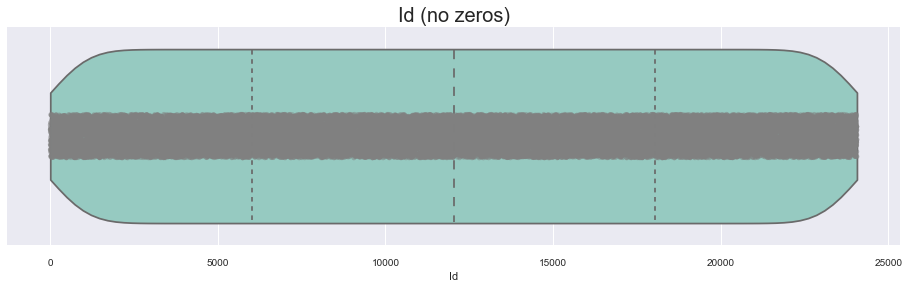

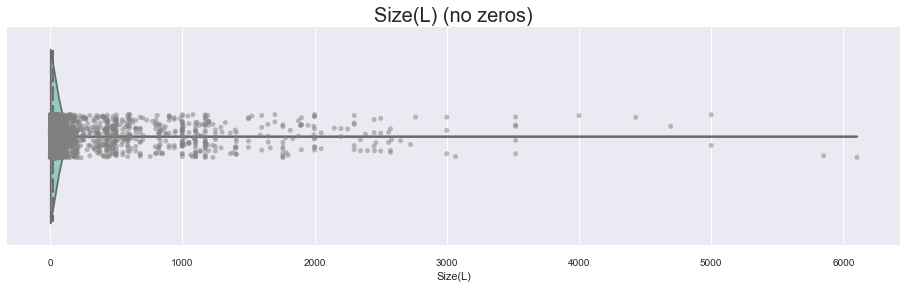

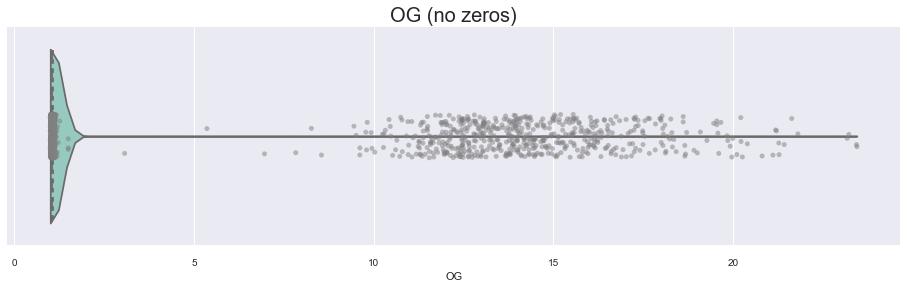

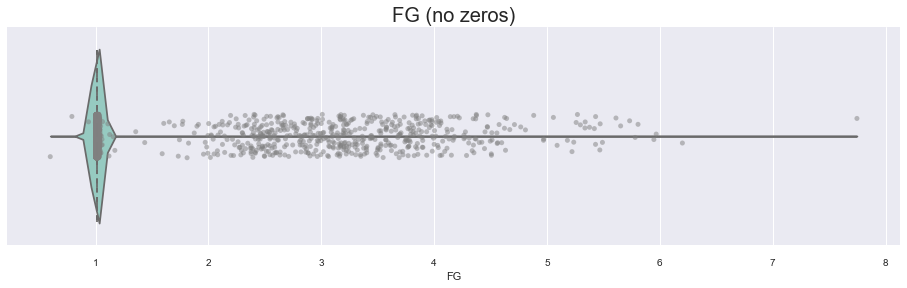

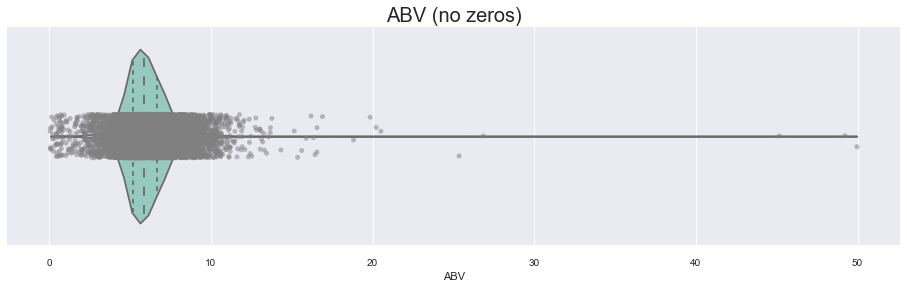

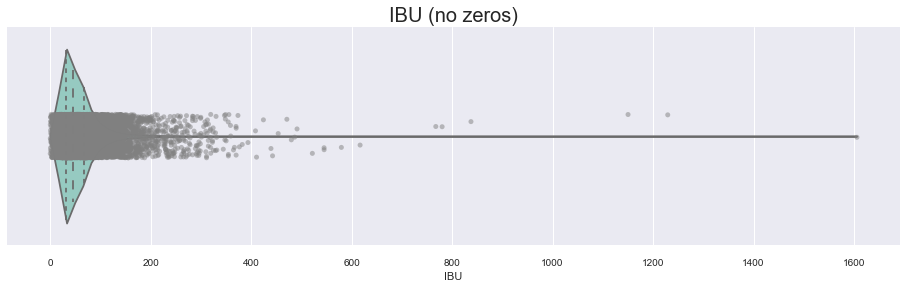

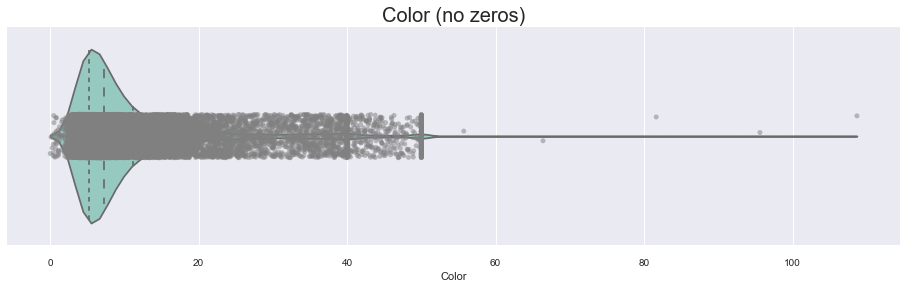

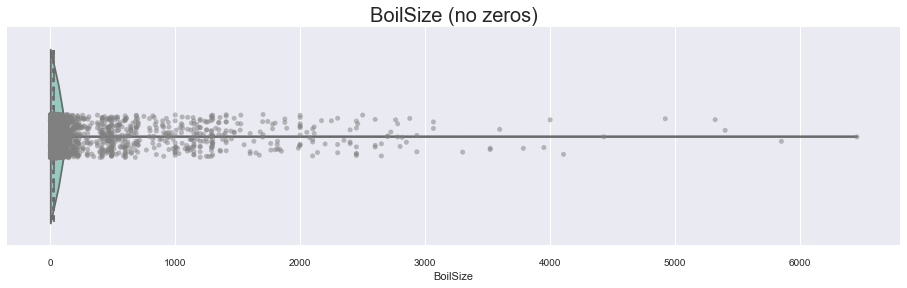

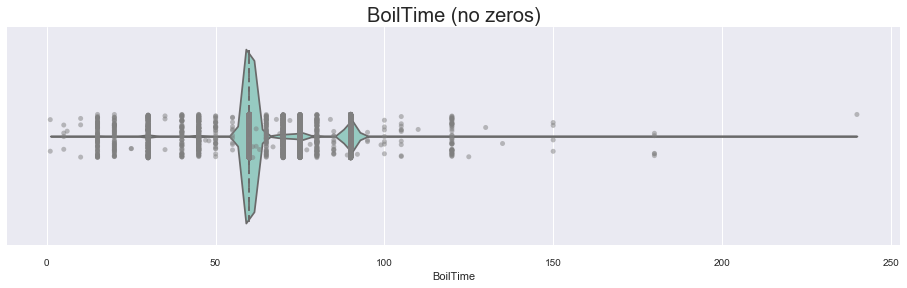

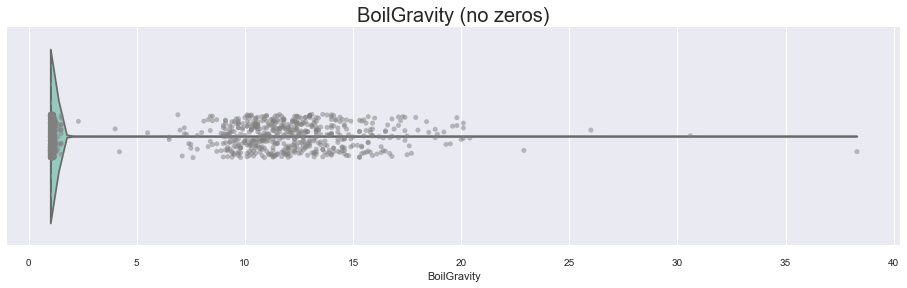

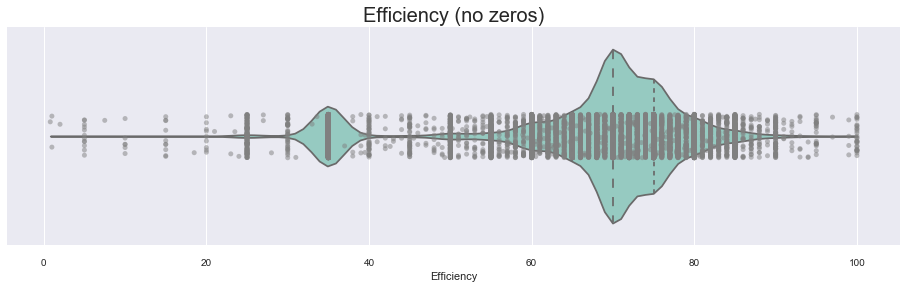

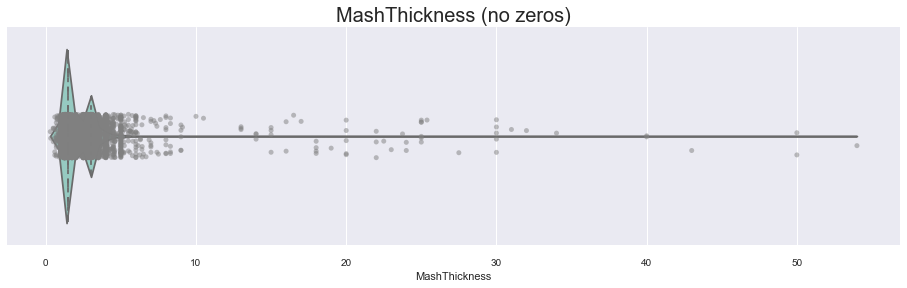

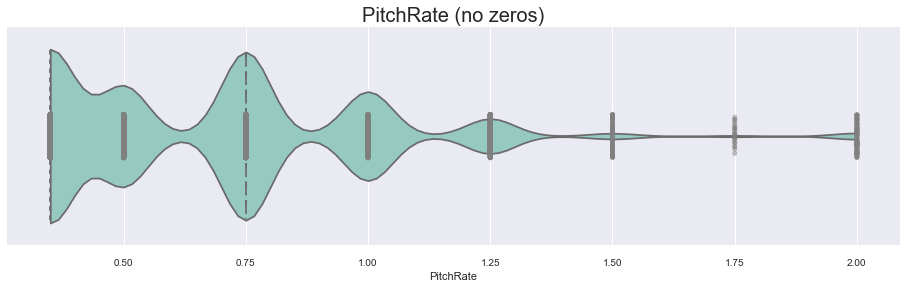

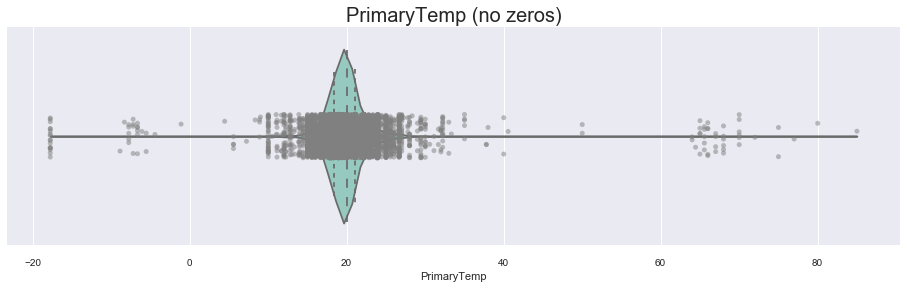

In [11]:
for col in num:
    plot_num(df[col], col, zeros = False )

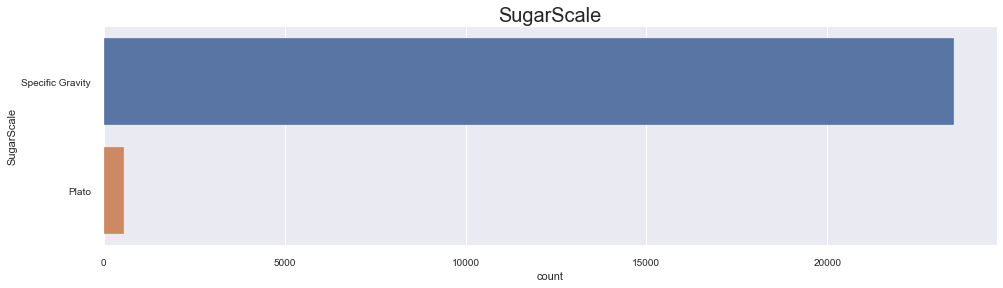

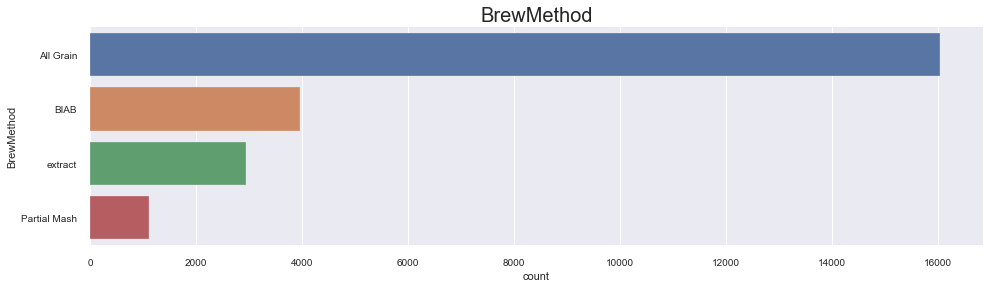

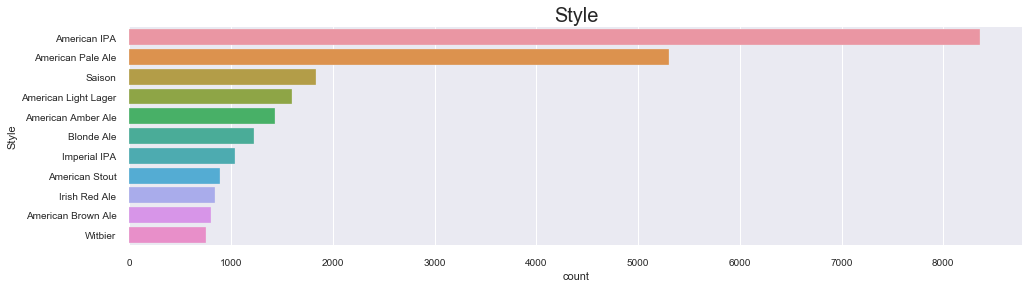

In [12]:
for col in cat:
    plot_cat(df[col],col)

# Finaliza EDA. Voy a por el árbol de decisión

In [13]:
from sklearn.preprocessing   import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.tree            import DecisionTreeClassifier, plot_tree
from sklearn.ensemble        import RandomForestClassifier
from sklearn.linear_model  import LogisticRegression
from sklearn.ensemble      import ExtraTreesClassifier
from sklearn.ensemble      import GradientBoostingClassifier
#from xgboost               import XGBClassifier, plot_tree

from sklearn.metrics         import accuracy_score, balanced_accuracy_score, plot_confusion_matrix
from sklearn.inspection      import permutation_importance, plot_partial_dependence

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


### Veo como se distribuye Style

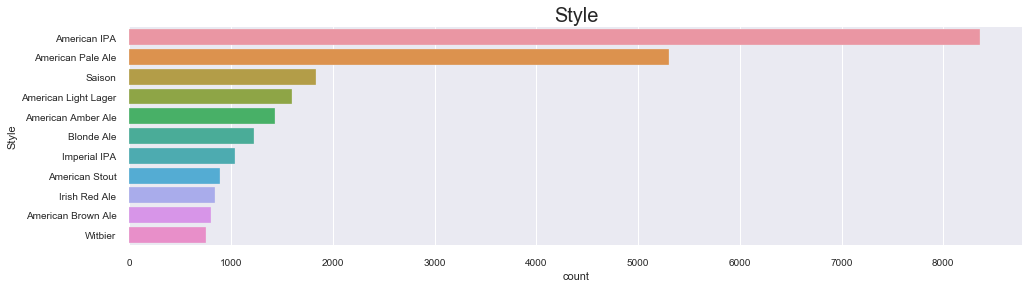

In [14]:
plot_cat(df.Style, 'Style')

In [15]:
# Columnas que tienen nulos
df.isna().sum(axis = 0)

Id                   0
Size(L)              0
OG                   0
FG                   0
ABV                  0
IBU                  0
Color                0
BoilSize             0
BoilTime             0
BoilGravity        936
Efficiency           0
MashThickness     9866
SugarScale           0
BrewMethod           0
PitchRate        13134
PrimaryTemp       7488
Style                0
dtype: int64

In [16]:
# PitchRate tiene 13134 de 24066. Más de la mitad de filas con Nan, así que me la cargo.
# Mash thickness tiene 9866 Nan que son más del 40 por ciento. Me la cargo la dimensión
#df2 = df.drop(columns=["MashThickness", "PitchRate","PrimaryTemp"])
#df = df2

In [17]:
# Columnas que tienen nulos


In [18]:
# Voy a añadir la media de BoilGravity a los NaN y añadir una nueva columna indicando si BoilGravity existía o no.
df["BoilGravity"].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
24061    False
24062    False
24063    False
24064    False
24065    False
Name: BoilGravity, Length: 24066, dtype: bool

In [19]:
# Añado la columna para saber los no nulos
df["BoilGravityWasMissing"] = df["BoilGravity"].isna()
df["MashThicknessWasMissing"] = df["MashThickness"].isna()  
df["PitchRateWasMissing"] = df["PitchRate"].isna()
df["PrimaryTempWasMissing"] = df["PrimaryTemp"].isna()

In [20]:
BoilGravityMedian = df["BoilGravity"].median()
print(BoilGravityMedian)

1.047


In [21]:
#Sustituyo los NaN con la media
df["BoilGravity"].fillna(df["BoilGravity"].median(), inplace=True)
df["MashThickness"].fillna(df["MashThickness"].median(), inplace=True)
df["PitchRate"].fillna(df["PitchRate"].median(), inplace=True)
df["PrimaryTemp"].fillna(df["PrimaryTemp"].median(), inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24066 entries, 0 to 24065
Data columns (total 21 columns):
Id                         24066 non-null int64
Size(L)                    24066 non-null float64
OG                         24066 non-null float64
FG                         24066 non-null float64
ABV                        24066 non-null float64
IBU                        24066 non-null float64
Color                      24066 non-null float64
BoilSize                   24066 non-null float64
BoilTime                   24066 non-null int64
BoilGravity                24066 non-null float64
Efficiency                 24066 non-null float64
MashThickness              24066 non-null float64
SugarScale                 24066 non-null object
BrewMethod                 24066 non-null object
PitchRate                  24066 non-null float64
PrimaryTemp                24066 non-null float64
Style                      24066 non-null object
BoilGravityWasMissing      24066 non-null bool
M

In [57]:
# Reemplazo las categorías con su valor numérico
# Pero recuerda que cat tiene tres columnas que hemos eliminado del data frame. Lo recalculo
cat  = df.select_dtypes(include=[object]).columns

In [64]:
cat

Index(['SugarScale', 'BrewMethod', 'Style'], dtype='object')

In [65]:
cat.pop(2)

AttributeError: 'Index' object has no attribute 'pop'

In [ ]:
df[cat] = df[cat].apply(LabelEncoder().fit_transform)
df.head()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24066 entries, 0 to 24065
Data columns (total 21 columns):
Id                         24066 non-null int64
Size(L)                    24066 non-null float64
OG                         24066 non-null float64
FG                         24066 non-null float64
ABV                        24066 non-null float64
IBU                        24066 non-null float64
Color                      24066 non-null float64
BoilSize                   24066 non-null float64
BoilTime                   24066 non-null int64
BoilGravity                24066 non-null float64
Efficiency                 24066 non-null float64
MashThickness              24066 non-null float64
SugarScale                 24066 non-null int32
BrewMethod                 24066 non-null int32
PitchRate                  24066 non-null float64
PrimaryTemp                24066 non-null float64
Style                      24066 non-null int32
BoilGravityWasMissing      24066 non-null bool
Mash

In [25]:

# Ahora defino lo que conozco, y lo que quiero descubrir, la y = Style
x = df.drop("Style", axis="columns")
y = df["Style"]

# Divido, un 80% para entrenamiento y 20% para validación.

In [26]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y,
                                                      test_size=0.2,
                                                      stratify=y, 
                                                      random_state=0)

In [27]:
## Entreno un modelo Árbol de decisión
x_train, x_valid, y_train, y_valid = train_test_split(x, y,
                                                      test_size=0.2,
                                                      stratify=y, 
                                                      random_state=0)

In [28]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Una vez he entrenado el modelo con x_train, y_train, puedo usarlo con X_valid para que vuelva a predecir

In [29]:
preds = model.predict(x_valid)
preds

array([2, 2, 6, ..., 2, 2, 2])

In [30]:
# Lanzo métricas a ver cómo ha ido.
print("Accuracy (Caution):", accuracy_score(y_valid, preds)*100)

Accuracy (Caution): 50.14540922309929


In [31]:
print("Balanced accuracy: ", balanced_accuracy_score(y_valid, preds)*100)

Balanced accuracy:  44.73993074092874


c:\users\pacom\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


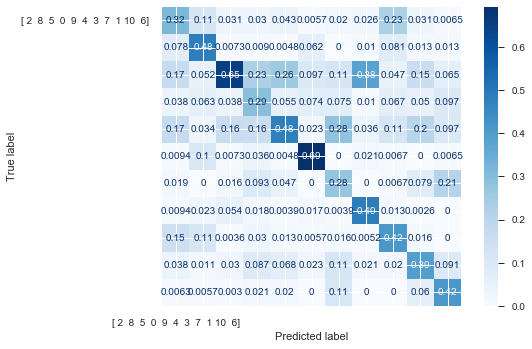

In [32]:
plot_confusion_matrix(model, x_valid, y_valid, display_labels=[df.Style.unique()],
                      cmap=plt.cm.Blues, normalize="pred");

# Voy con Random Forest

In [33]:
model = RandomForestClassifier(n_jobs=-1)
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [34]:
preds = model.predict(x_valid)
preds

array([2, 2, 0, ..., 2, 2, 2])

In [35]:
# Lanzo métricas a ver cómo ha ido.
print("Accuracy (Caution):", accuracy_score(y_valid, preds)*100)

Accuracy (Caution): 63.48151225592024


In [36]:
print("Balanced accuracy: ", balanced_accuracy_score(y_valid, preds)*100)

Balanced accuracy:  55.16027956978032


c:\users\pacom\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


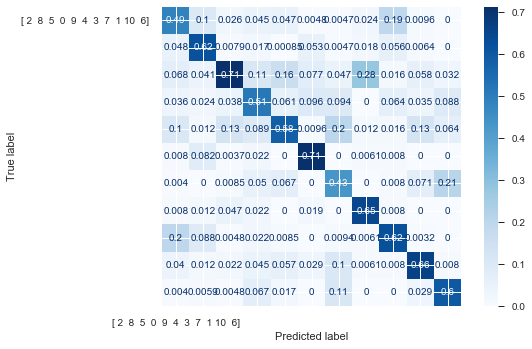

In [37]:
plot_confusion_matrix(model, x_valid, y_valid, display_labels=[df.Style.unique()],
                      cmap=plt.cm.Blues, normalize="pred");

# Ahora pruebo todos

In [38]:
models = [
    ('Logistic Regression', LogisticRegression(n_jobs=-1)),
    ('Decision Tree',       DecisionTreeClassifier()),
    ('Extra Trees',         ExtraTreesClassifier(n_jobs=-1)),
    ('Random Forest',       RandomForestClassifier(n_jobs=-1)),
    ('Gradient Boosting',   GradientBoostingClassifier())
]

In [39]:
outcome = []
Modelnames = []

In [40]:
for name, model in models:
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    cv_r = cross_val_score(model, x, y, cv=skf, scoring='accuracy')
    outcome.append(cv_r)
    Modelnames.append(name)
    print("%s: %.2f%% (%.2f%%)" % (name, cv_r.mean()*100, cv_r.std()*100))

Logistic Regression: 36.68% (0.38%)
Decision Tree: 49.59% (0.60%)
Extra Trees: 60.88% (0.62%)
Random Forest: 63.42% (0.43%)
Gradient Boosting: 63.76% (0.64%)


In [41]:
# Elijo el gradient boosting. 
# Cargo el conjunto que voy a 

<function print>